<a href="https://colab.research.google.com/github/paulors82/Data_Sciense/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--<img alt="Colaboratory logo" width="15%" src="https://drive.google.com/file/d/1QWPJ7HeuHynLLbo_NqATBkWAGNkJ50tu/view?usp=sharing">-->
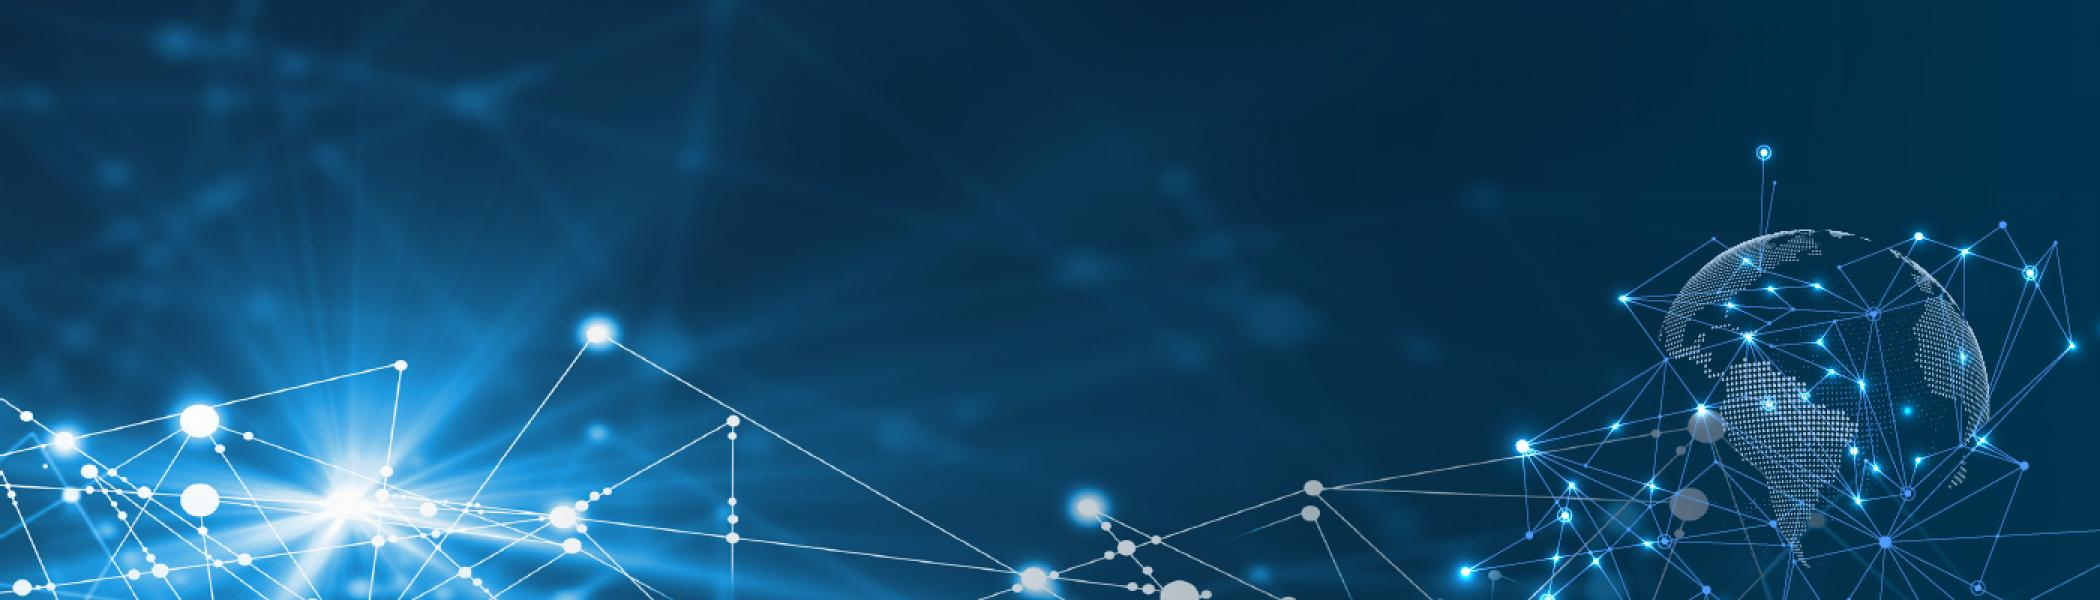

## **Data Science**
*Paulo Roberto da Silva*

---

# Análise dos Dados do Airbnb - *Paris*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, mas com uma pequena peculiaridade, **não possui nenhum hotel**!

"*Em sua essência, o Airbnb é uma comunidade aberta que tem como objetivo aproximar o mundo, incentivando experiências compartilhadas significativas entre pessoas de todas as partes do mundo. Nossa comunidade inclui milhões de pessoas de praticamente todos os países do mundo. É uma comunidade extremamente diversificada, que reúne pessoas de diferentes culturas, valores e normas." `(fonte Airbnb)`*

Em resumo eles conectam viajantes que precisam se hospedar, com anfitriões que desejam alugar parte ou todo o seu imóvel.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Paris na França, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Foi utilizada a base de dados `listings.csv`




In [2]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/france/ile-de-france/paris/2021-04-10/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos dar uma olhada no nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86957,2.36127,Entire home/apt,125,3,1,2019-01-02,0.04,1,286
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83191,2.31870,Entire home/apt,60,2,9,2019-10-24,0.17,1,365
2,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,47,1,237,2021-04-12,1.65,1,58
3,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,90,10,272,2021-03-28,2.23,1,327
4,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.05,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print('Entradas: {}'.format(df.shape[0]))
print('Variáveis: {}\n'.format(df.shape[1]))
# verificar tipo das variáveis
display(df.dtypes)


Entradas: 63090
Variáveis: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
print('Quantidade Valores Ausentes:\n\n', (df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

Quantidade Valores Ausentes:

 neighbourhood_group               1.000000
reviews_per_month                 0.242606
last_review                       0.242606
host_name                         0.027802
name                              0.000983
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64


Como podemos verificar acima a variável neighbourhood_group tem 100% de seus valóres ausentes, vamos removê-la do Dataset para que não prejudique a análise*

In [ ]:
df = df.drop(columns='neighbourhood_group')

### **Q3. Qual a média dos preços de aluguel?**

In [11]:
# verificando a média da coluna `price`
print("Média de Preços: ", round(df['price'].sum() / df.shape[0], 2), '*valor em euros')


Média de Preços:  112.92 *valor em euros


### **Q4. Qual o tipo de distribuição das variáveis?** 

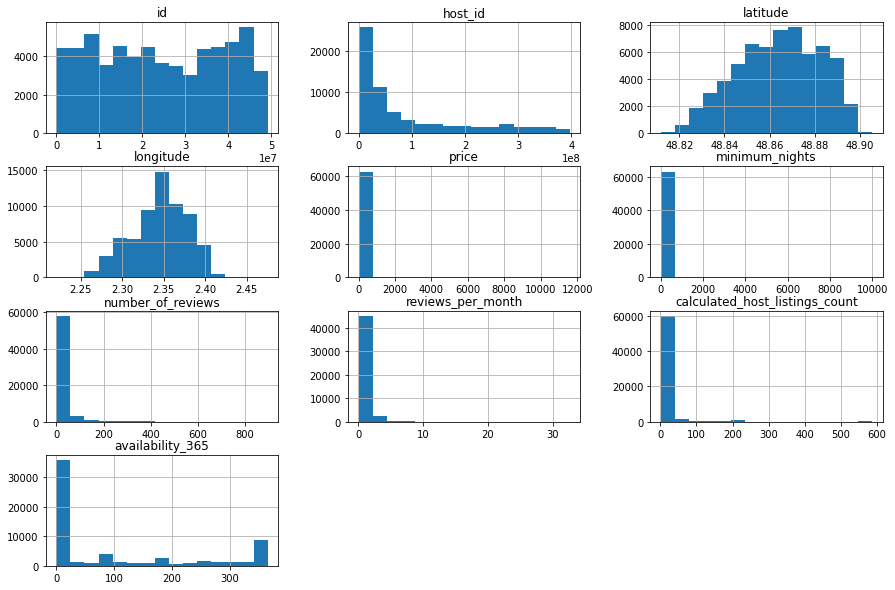

In [62]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q5. Será que existem "*outliers*" que possam estar distorcendo nossos histogramas e média de preços?**
*“Um outlier é uma observação que se diferencia tanto das demais observações que levanta suspeitas de que aquela observação foi gerada por um mecanismo distinto” (Hawkins, 1980).*

  Outliers são também conhecidos como  os dados discrepantes em um dataset, os pontos fora da curva.

Podemos ver indícios de sua presença atráves da análise dos histogramas acima, por exemplo nas variáveis `prices` e `minimum_nights`.
  Os valores não seguem uma distribuição e distorcem toda a representação gráfica. 

In [12]:
#Verificando o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,63090.000000,63090.000000,63090.000000,47784.000000,63090.000000,63090.000000
mean,112.915232,6.032224,18.768806,0.631386,12.849612,100.793232
std,193.989353,45.303764,40.943593,0.971980,62.425572,137.440577
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,58.000000,1.000000,1.000000,0.110000,1.000000,0.000000
50%,80.000000,2.000000,5.000000,0.300000,1.000000,0.000000
75%,120.000000,4.000000,18.000000,0.770000,2.000000,184.000000
max,11600.000000,9999.000000,895.000000,32.660000,587.000000,365.000000


Olhando o resumo estatístico acima observamos algumas hipóteses:

* A variável `minimum_nights` (*Quantidade mínima de noites*) possui valor superior a 365 dias no ano.
* A variável `price`(*Preço*) tem sua média em 112,91, porém um valor máximo de 11600,00.

Vamos realizar um **Boxplot** para `minimum_nights`

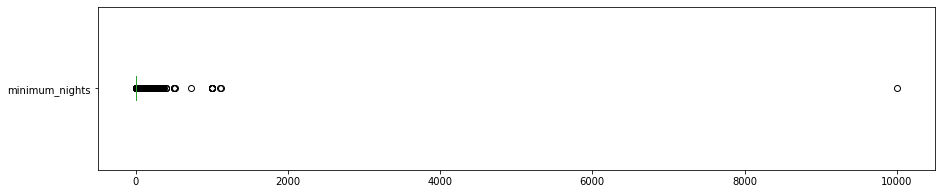

minimum_nights valores acima de 30 dias:
979 entradas
1.5518% do total de entradas


In [24]:
#minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#verificando a quantidade de valores acima de 30 dias
print('minimum_nights valores acima de 30 dias:')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}% do total de entradas'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


**Boxplot** para `price`


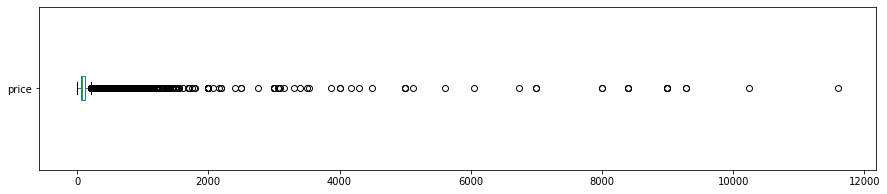

"price" valores acima de 500 euros:
831 entradas
1.3172% do total de entradas


In [54]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#verificando a quantidade de valores acima de 30 dias
print('"price" valores acima de 500 euros:')
print('{} entradas'.format(len(df[df.price > 500])))
print('{:.4f}% do total de entradas'.format((len(df[df.price > 500]) / df.shape[0])*100))

#### Histogramas sem *outliers*
Vamos remover do nosso *DataFrame* os outliers das variáveis `price` e `minimum_nights` *(Serão removidas as entradas com `price` acima de 500 e `minimum_nights` maior que 30 dias)*. 

Após isso plotar novamente o histograma e verificar se teremos alguma diferença nos gráficos e no preço médio da estadia.


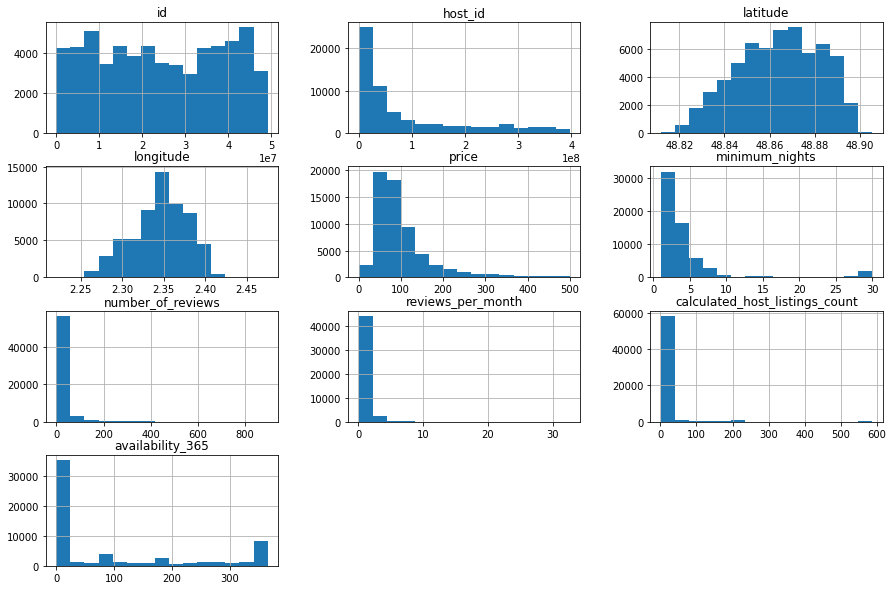



 Média de Preços:  112.92 *valor em euros


In [29]:
#Remover outliers em novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#plotando novamente o histograma
df_clean.hist(bins=15, figsize=(15,10));
plt.show()

#Verificando novamente a média de preços
print("\n\n Média de Preços: ", round(df['price'].sum() / df.shape[0], 2), '*valor em euros')

Podemos notar uma clara diferença nos gráficos de `price` e `minimum_nights`.
Referente a média de preços não houve alteração, devido ao número de entradas com valor superior a 500 euros corresponder a apenas 1,3% do total.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Vamos agora analisar a coluna `room_type`que indica o tipo de locação que está anunciada no Airbnb (apartamento/casas inteiras, aluguel de um quarto, quarto compartilhado...)

Analisando a quantidade de ocorrências para cada tipo de aluguel

In [30]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    52269
Private room        7373
Hotel room          1252
Shared room          404
Name: room_type, dtype: int64

Porcentagem correspondente a cada tipo de aluguel

In [59]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(round((df_clean.room_type.value_counts() / df_clean.shape[0])*100) , 2)


(Entire home/apt    85.0
 Private room       12.0
 Hotel room          2.0
 Shared room         1.0
 Name: room_type, dtype: float64, 2)

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [61]:
# ver a média da coluna `minimum_nights`
print('A média mínima de noites para as locações Airbnb em Paris é de:', round(df_clean.minimum_nights.mean(), 2), ' noites')


A média mínima de noites para as locações Airbnb em Paris é de: 4.1  noites


### **Q8. Qual a localidade mais cara do dataset?**



Primeiro vamos verificar os 10 bairros com a maior média de preço de locação.

In [38]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
# 

neighbourhood
Élysée            149.710044
Louvre            143.283710
Luxembourg        137.429418
Palais-Bourbon    136.084171
Hôtel-de-Ville    130.225014
Passy             125.165669
Temple            122.325825
Bourse            119.326000
Panthéon          116.253030
Opéra             113.727332
Name: price, dtype: float64

Acima verificamos que o bairro Élysée tem a maior média de preço, seguido do Louvre e Luxembourg. O que faz sentido, quem nunva ouviu falar da famosa avenida ***Champs-Élysées***.

A título de curiosidade, vamos ver agora as 10 hospedagens mais caras de Paris e os bairros onde estão localizadas. 

*Utilizamos o nosso DataFrame anterior a retirada dos outliers, pois no novo DataFrame nós temos como valor máximo de locação 500 euros.* 

In [64]:
df.groupby(['neighbourhood']).price.max().sort_values(ascending=False)[:10]


neighbourhood
Temple                 11600
Passy                  10250
Opéra                   9280
Entrepôt                9280
Batignolles-Monceau     9000
Louvre                  9000
Vaugirard               9000
Observatoire            8403
Élysée                  8000
Buttes-Montmartre       6742
Name: price, dtype: int64

No Dataset disponibilizado pelo Airbnb constam a Latitude e Longitude das propriedades, com isso podemos plotar um gráfico de localização de cada ponto. Vamos utilizar `x=longitude`e `y=latitude`.

Os pontos são coloridos de acordo com o preço de locação, conforme a barra lateral do gráfico.

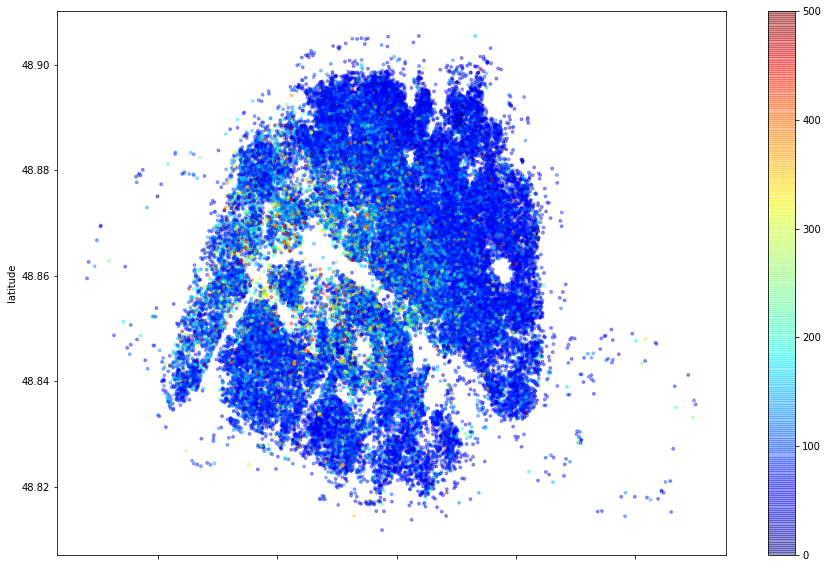

In [52]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(15,10));

Nas áreas mais periféricas do gráfico podemos observar uma maior incidência de pontos na cor roxa, que são as propriedades de menor valor de aluguel.
Enquanto na parte mais central vemos uma maior concentração das propriedades de maior custo.

## Conclusões

Foi realizada apenas uma análise superficial na base de dados do Airbnb, onde podemos perceber a presença *outliers* em algumas variáveis, o que pode distorcer as informações estatísticas.

Analisamos também algumas informações relevantes como média dos valores de hospedagem, mínimo de noites, regiões mais valorizadas e qual tipo de hospedagens mais comuns na cidade.

Foi utilizado apenas um *dataset* em versão resumida, para uma análise exploratória profunda, o ideal é ser utilizada a base de dados completa.
